# Chaos Theory

In higher dimensions we represent the state with the vector $\mathbf{x} \in \mathbb{R}^n$. Since we know $\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x})$, a numerical solution can be computed starting from an initial condition $t_0$ using three numerical methods we discussed yesteday. <br><br>
As an example, consider the Lorenz system ($\mathit{n=3}$) given by the set of differential equations:<br>
$\dot{x} = \sigma (y-x)$<br>
$\dot{y} = x(\rho-z)-y$<br>
$\dot{z} = xy - \beta z$<br>

Lorenz system produces chaotic dynamics under certain parameters sets. One such set is $(\sigma,\rho,\beta) = (10, 28, 2.667 )$, which produces the celebrated ['Lorenz Butterfly'](https://www.google.com/search?client=safari&sxsrf=ALeKk03RKc84pQCltiGRXrIV45xJpK2ZSA%3A1583567768569&source=hp&ei=mFNjXsWoHs-6aZT9ocgL&q=lorenz+butterfly&oq=lorenz+b&gs_l=psy-ab.1.0.35i39i19j0l6j0i203l3.827.1484..3980...1.0..0.150.985.0j8......0....1..gws-wiz.......35i39j0i67j0i131.TEZnEqEFNsU) in the state space (The space of $(x,y,z)$). 
In this part, we will try to replicate Lorenz Butterfly using three different integrators.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.integrate import odeint
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl

In [2]:
#Plot configurations
mpl.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.grid"] = True 

### Integrators

In [3]:
def Euler(f, y0, t):  #Euler integrator
    y = np.zeros((len(t),len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        dt = t[i+1] - t[i]
        y[i+1]=y[i]+dt*f(y[i],t[i])
    return y

def Heun(f, y0, t):  # Heun integrator
    y = np.zeros((len(t),len(y0)))
    y[0] = y0
    for i in range(len(t)-1):
        dt = t[i+1] - t[i]
        y_tilde = y[i] + dt*f(y[i],t[i]) # Euler formulation
        y[i+1] = y[i] + 0.5*dt*(f(y[i],t[i])+f(y_tilde,t[i]+dt))
    return y

def rk4(f, y0, t): #RK4 integrator
    n = len(t)
    m = len(y0)
    y = np.zeros((n,m))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = h * f(y[i], t[i])
        k2 = h * f(y[i] + 0.5 * k1, t[i] + 0.5 * h)
        k3 = h * f(y[i] + 0.5 * k2, t[i] + 0.5 * h)
        k4 = h * f(y[i] + k3, t[i+1])
        y[i+1] = y[i] + (k1 + 2.0 * ( k2 + k3 ) + k4)/6.0
    return y

Let us define Lorenz equations as a Python function (please note that in the function defined below as 'Lorenz', y is the state vector and t is the time vector. Not to be confused with arguments of the Lorenz equations which are time independent!):

In [4]:
def Lorenz(y,t):
    dy = np.zeros_like(y)
    dy[0] = sigma*(y[1]-y[0])        # first ODE of Lorenz system, x_dot = dy[0]
    dy[1] = y[0]*(rho-y[2]) - y[1]   # second ODE of Lorenz system, y_dot = dy[1]
    dy[2] = y[0]*y[1] - beta*y[2]    # third ODE of Lorenz system, z_dot = dy[2]
    return dy

In [5]:
# Simulation parameters
t = np.arange(0,20,0.01)       # time vector
x0 = np.array([-8., 7., 27.]) #initial conditions
sigma, rho, beta = 10, 28, 2.667 #chaotic parameters for Lorenz

In [6]:
# Integration
euler_approx = Euler(Lorenz, x0, t)
heun_approx = Heun(Lorenz, x0, t)
rk4_approx = rk4(Lorenz, x0, t)

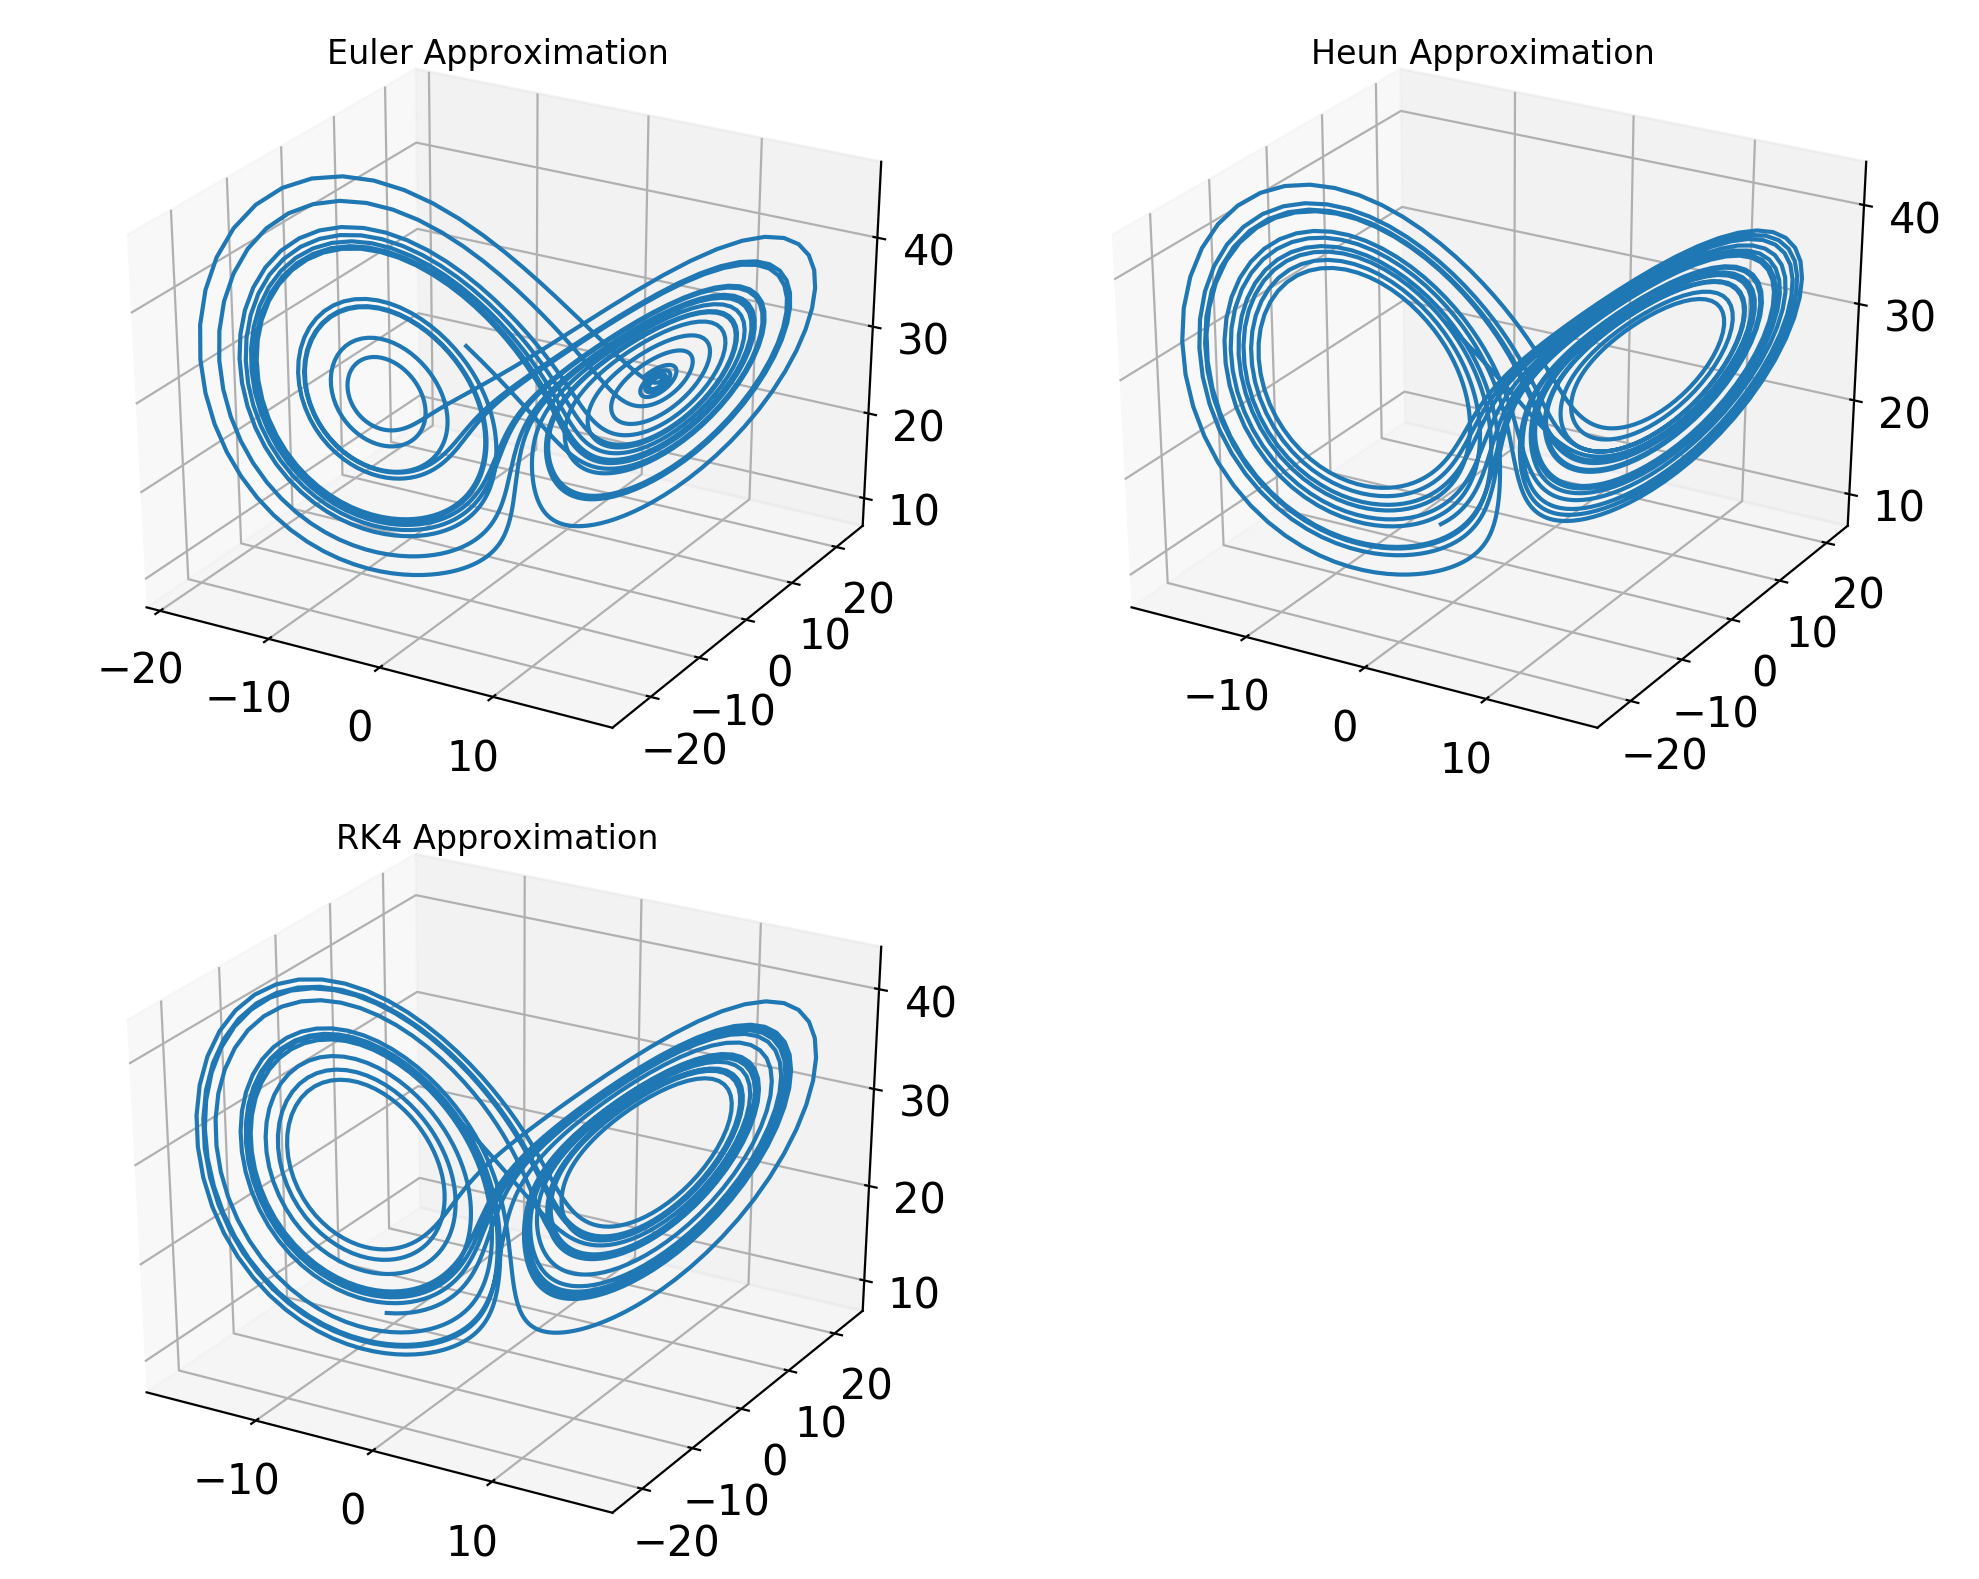

In [7]:
# Graphics
fig = plt.figure()

plt.subplot(221, projection='3d')
plt.plot(euler_approx[:,0], euler_approx[:,1], euler_approx[:,2])
plt.title('Euler Approximation')

plt.subplot(222, projection='3d')
plt.plot(heun_approx[:,0], heun_approx[:,1], heun_approx[:,2])
plt.title('Heun Approximation')

plt.subplot(223, projection='3d')
plt.plot(rk4_approx[:,0], rk4_approx[:,1], rk4_approx[:,2])
plt.title('RK4 Approximation')
plt.tight_layout()

## Lyapunov Exponent of Lorenz System

### Exponential Divergence of Nearby Trajectories

The motion on the attractor exhibits sensitive dependence on initial conditions: infinitesimally close trajectories diverge exponentially fast from each other. We define the distance between trajectories as:

\begin{align}
\|\delta (t)\| \approx \|\delta_0\| e^{\Lambda t}
\end{align}

where $\delta$ is the a measure of tiny seperation between trajectories, $\Lambda$ is constant defining the speed of divergence. For these two trajectories to diverge from each other exponentially $\Lambda$ should be greater than 0, and the system is then deduced to be chaotic. 

Below, we will study the difference in trajectories of two identical Lorenz systems with a slight difference in x initial condition only: (-8, 7, 27) and (-8.01, 7, 27)

In [8]:
t = np.linspace(0, 20, 200000)
lorenz1_x0 = np.array([-8., 7., 27.]) #initial conditions
lorenz2_x0 = np.array([-8.01, 7., 27.]) #slightly different initial conditions
lorenz1 = rk4(Lorenz, lorenz1_x0, t)
lorenz2 = rk4(Lorenz, lorenz2_x0, t)

Let us define the distance between trajectories, $\delta$

In [9]:
Distance = np.zeros(len(t))
def Dist(x,y):
    d = 0.0
    for i in range(0, len(x)):
        d += (x[i]-y[i])**2
    return d**(0.5)
for i in range(0, len(t)):
    Distance[i] = Dist(lorenz1[i],lorenz2[i])

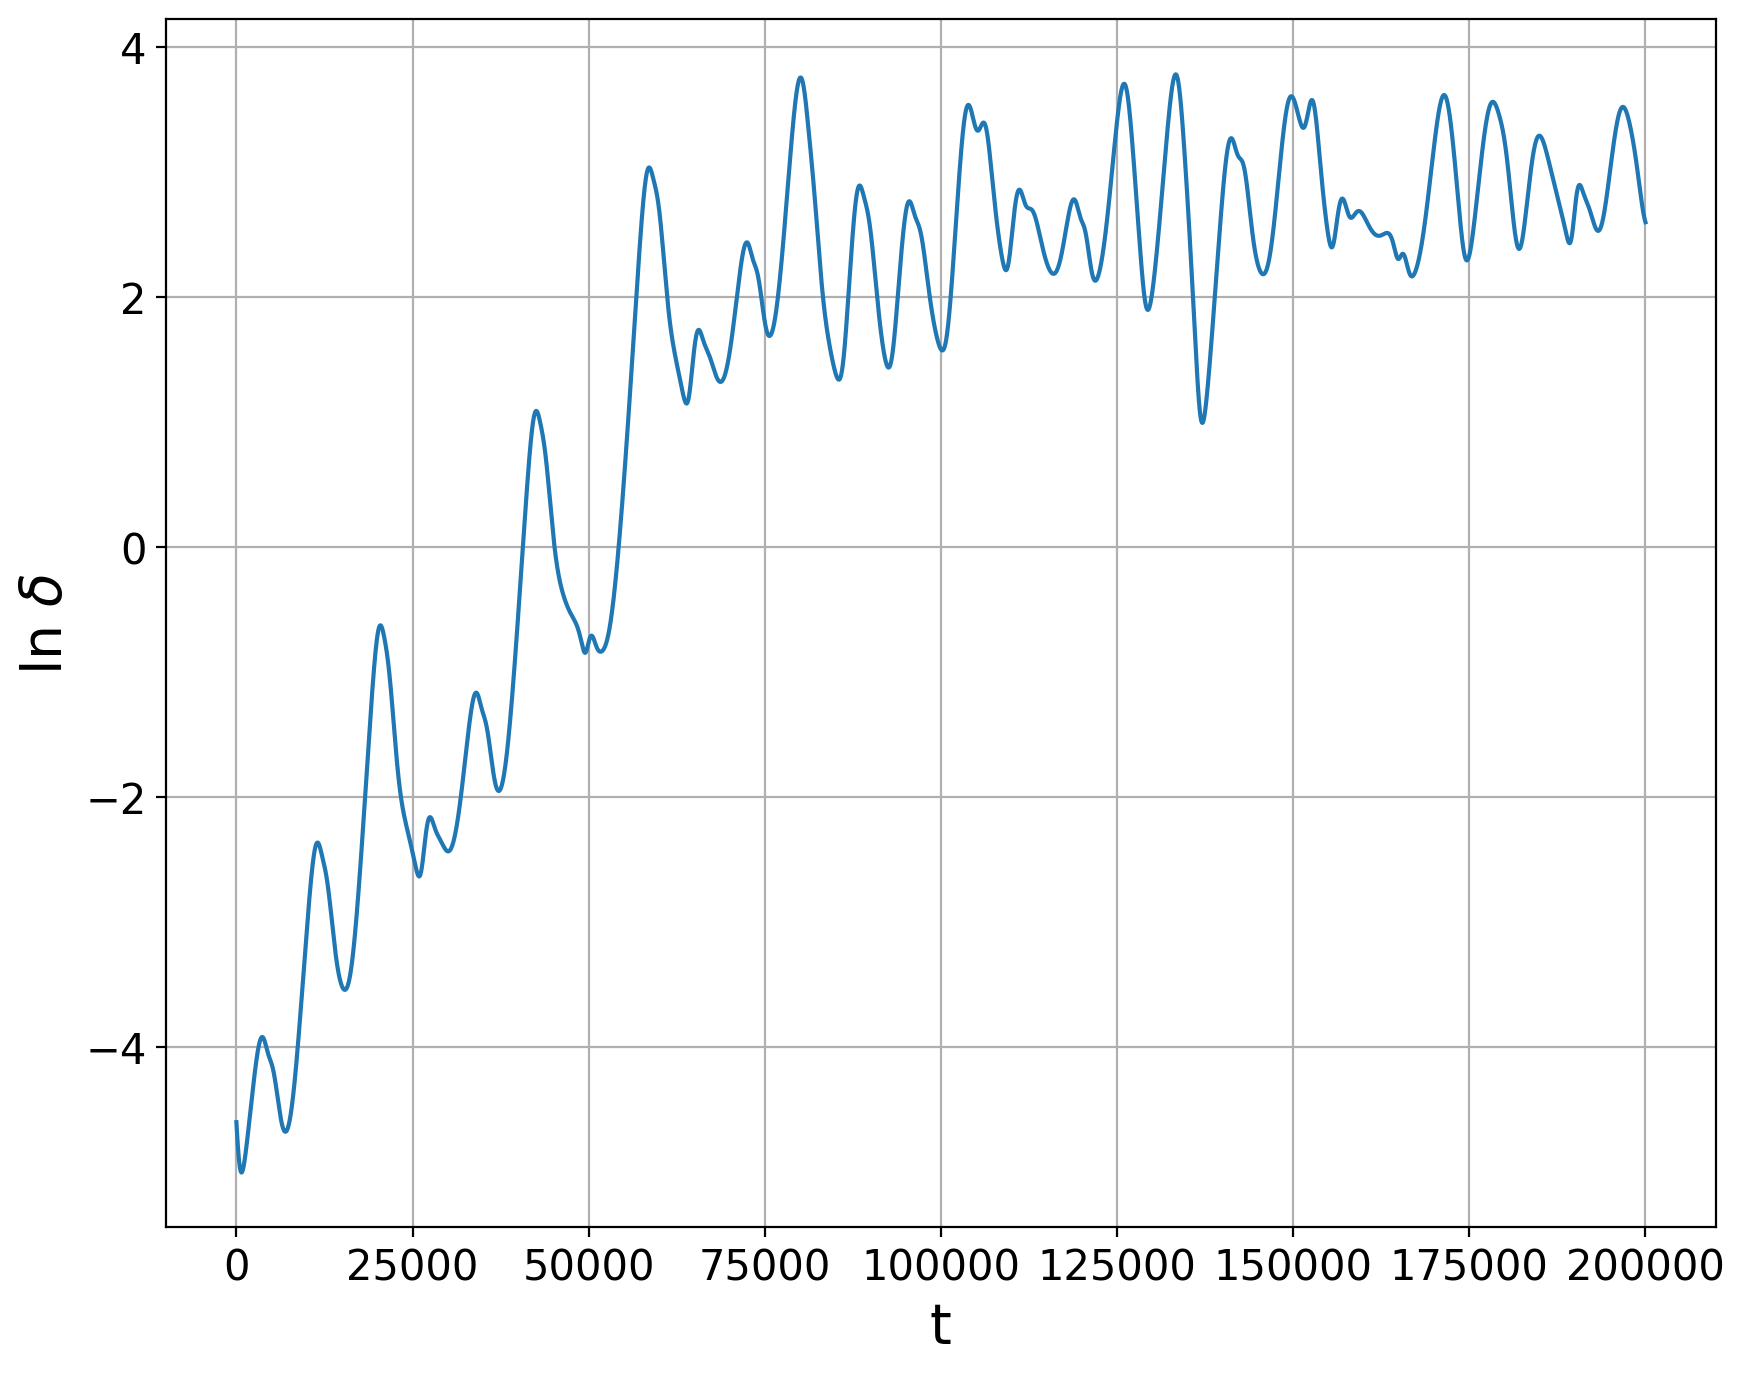

In [10]:
plt.plot(np.log(Distance))
plt.xlabel('t')
plt.ylabel('ln $\delta$')
plt.show()

In [11]:
coef = np.polyfit(t[:75000],np.log(Distance[:75000]),1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

Now we will fit a line to the increasing part of ln $\delta$. We rule out the saturated part as the trajectories move in a bounded space, so that the separation on the attractor is limited to a value. 

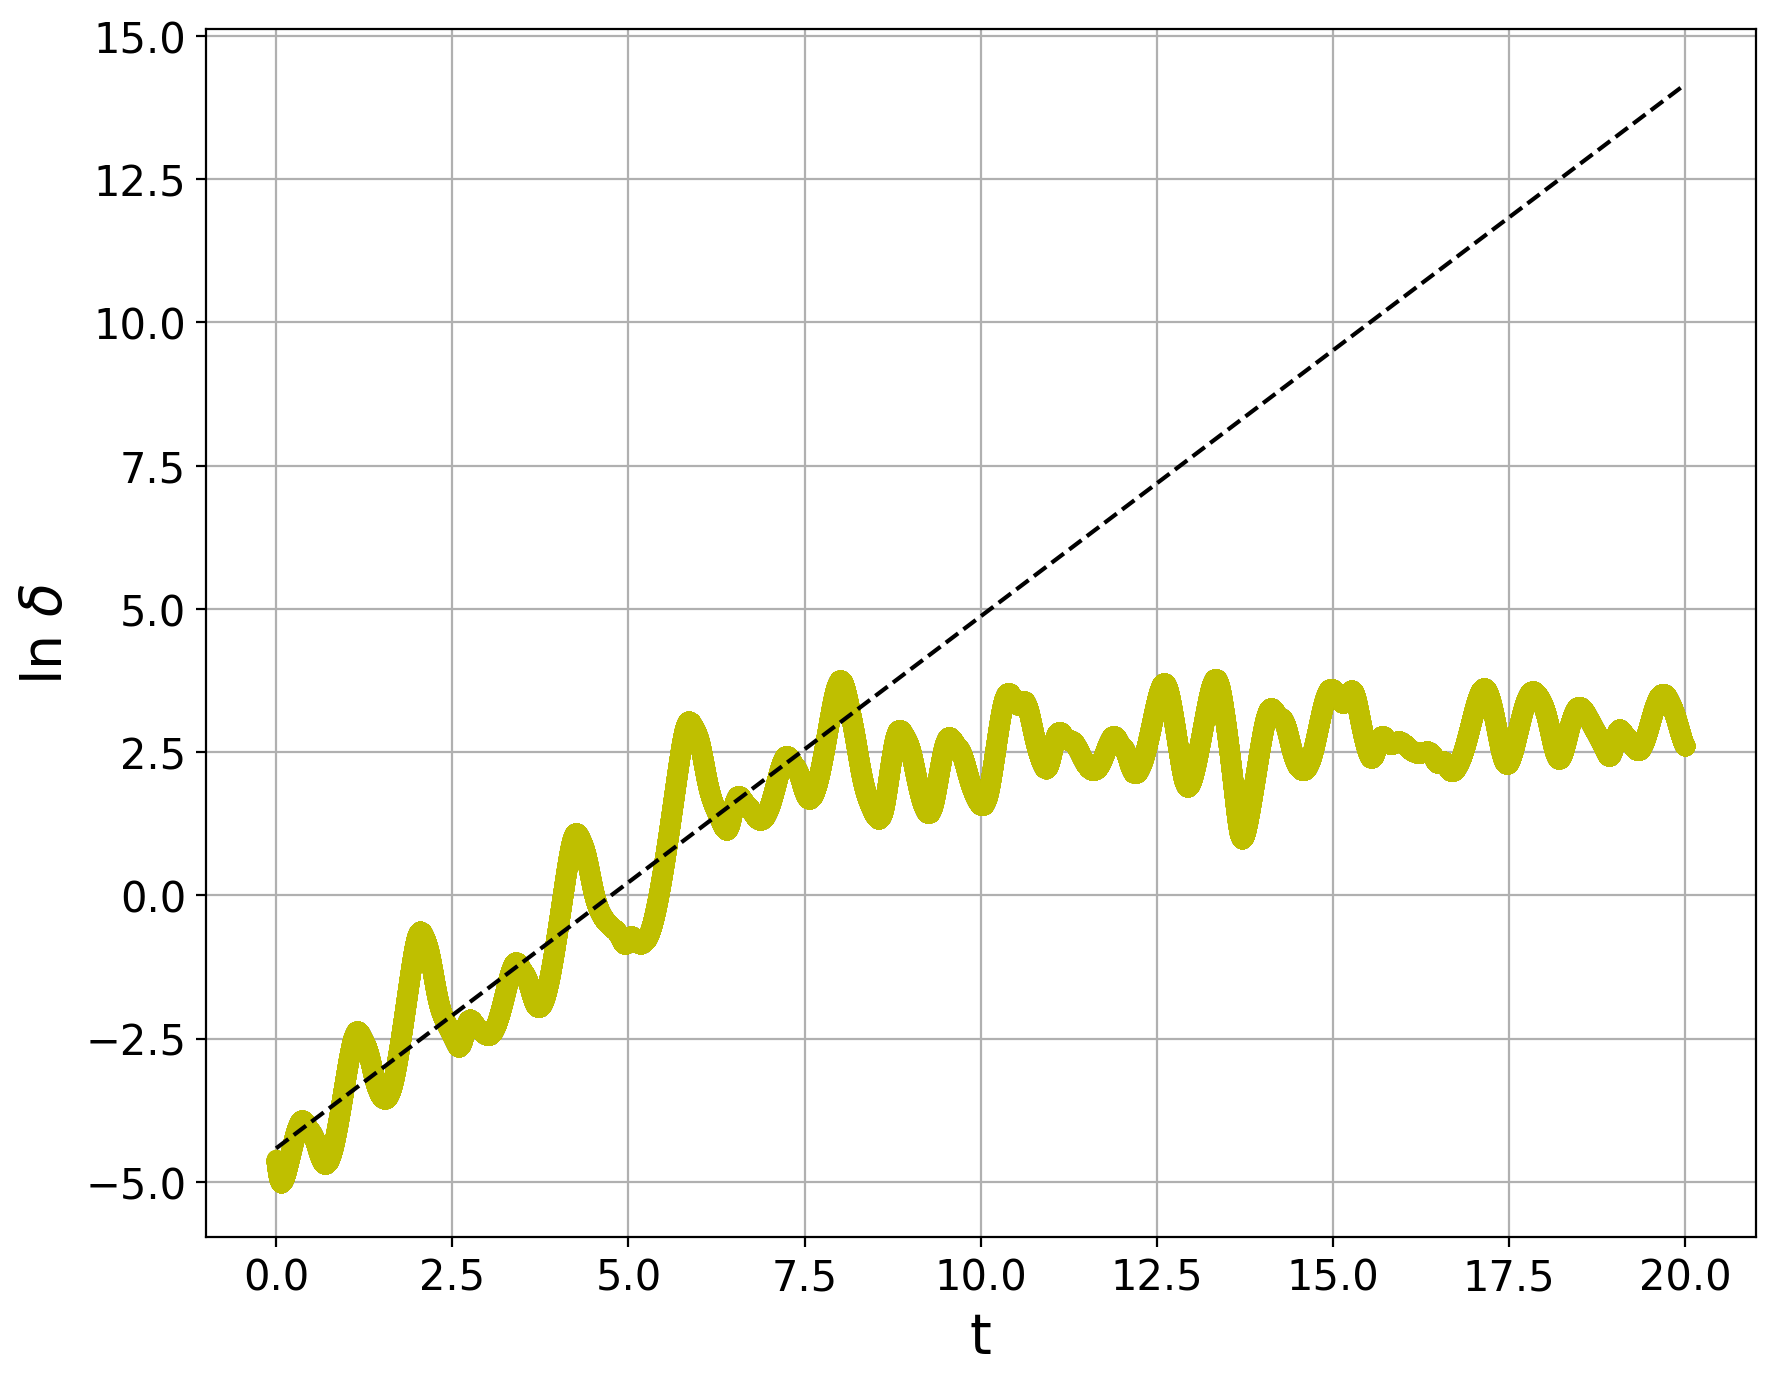

In [12]:
plt.plot(t,np.log(Distance), 'yo', t, poly1d_fn(t), '--k')
plt.xlabel('t')
plt.ylabel('ln $\delta$')
plt.show()

In [13]:
print('Lyapunov exponent:',coef[0])

Lyapunov exponent: 0.9282242762535596


# Synchronization of Chaos

In this example, we use two identical Lorenz systems coupled as below:<br>

\begin{align}
\mathbf{\dot{x}_1}=\mathbf{f}(\mathbf{x_1})+\alpha H(\mathbf{x_2}-\mathbf{x_1})\\
\mathbf{\dot{x}_2}=\mathbf{f}(\mathbf{x_2})+\alpha H(\mathbf{x_1}-\mathbf{x_2})\\
\end{align}<br>
where $\mathbf{{x}_1}$ and $\mathbf{{x}_2}$ in $\mathbb{R}^n $ are the state vectors of the two Lorenz systems.
We assume that the two systems are globally coupled, so $H = I$, the identity matrix, and $\alpha$ is the strength of the coupling.<br> 


In [14]:
def CoupledSystem(state, t):
    x1 = state[:3]
    x2 = state[3:]
    coupling = (x1 - x2) * alpha
    xdot1 = Lorenz(x1, t) - coupling
    xdot2 = Lorenz(x2, t) + coupling
    return np.concatenate((xdot1,xdot2), axis = 0)

In [27]:
alpha = 0.3
x1_zero = [1.1, 1.0, 1.0]
x2_zero = [1.0, 1.0, 1.0]
t = np.arange(0.0, 100, 0.01)
states = rk4(CoupledSystem, np.concatenate((x1_zero,x2_zero)), t)

The difference between the state vectors of these systems can be defined as the Euclidian Distance between $\mathbf{x}_1$ and $\mathbf{x}_2$, $\delta$.

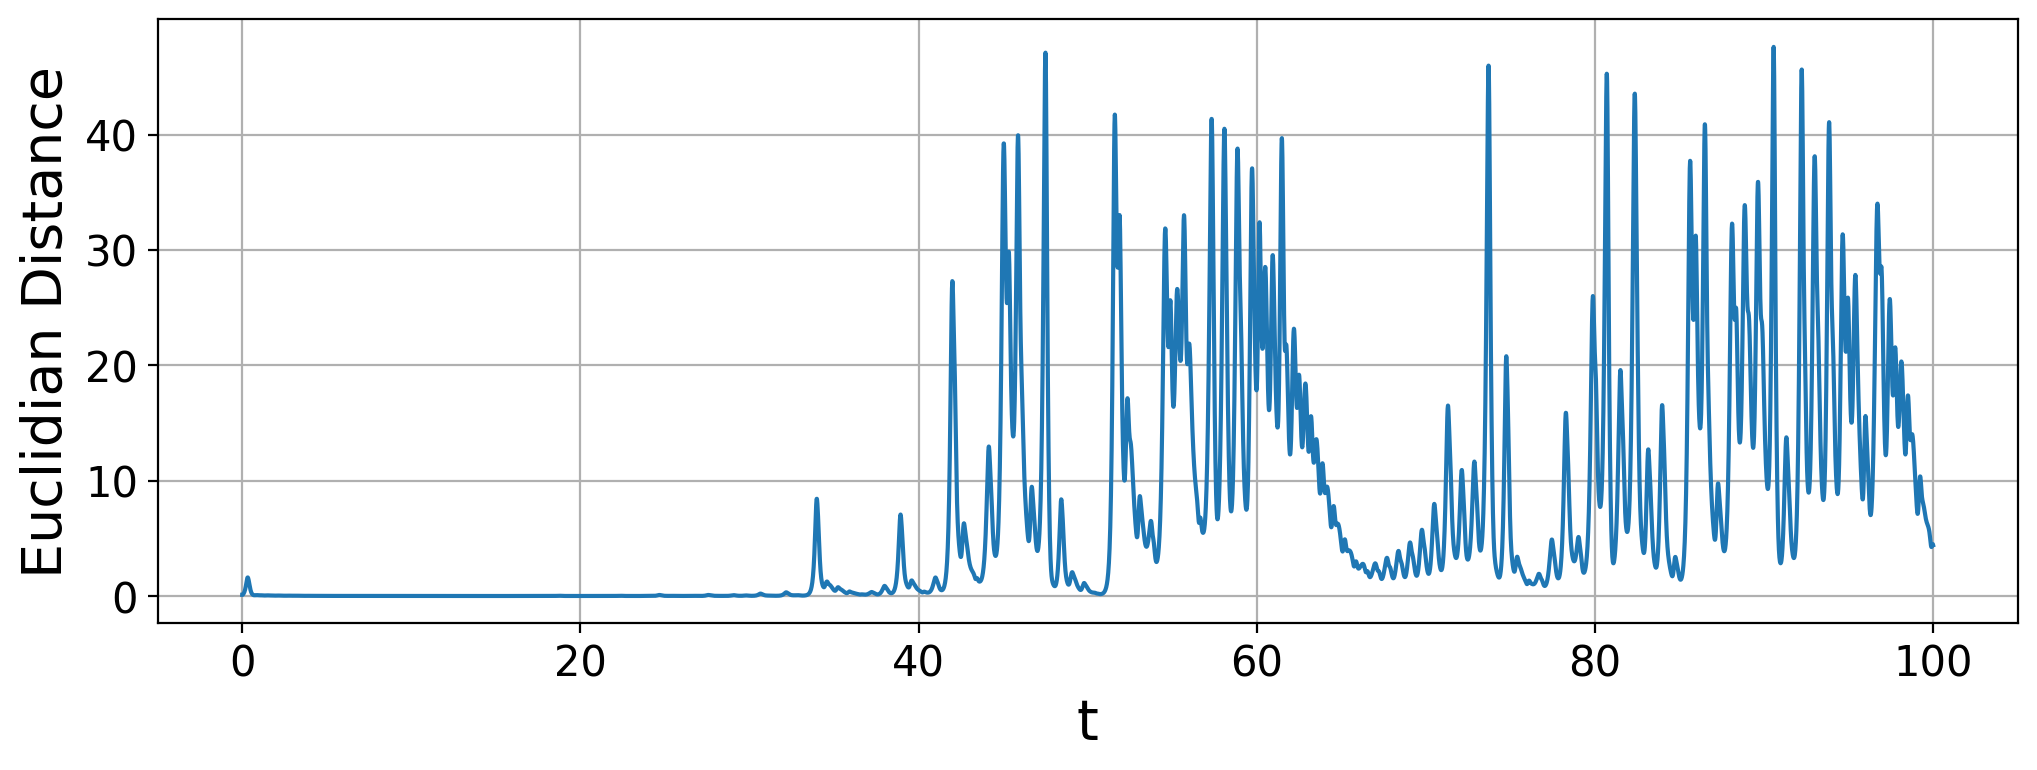

In [28]:
# Charting the Difference of the coupled states
Distance = np.zeros(len(t))
def Dist(x,y):
    d = 0.0
    for i in range(0, len(x)):
        d += (x[i]-y[i])**2
    return d**(0.5)
for i in range(0, len(t)):
    Distance[i] = Dist(states[i][:3],states[i][3:])
    
plt.rcParams["figure.figsize"] = (12,4) 
plt.plot(t, Distance)
plt.xlabel('t')
plt.ylabel('Euclidian Distance')
plt.show() 

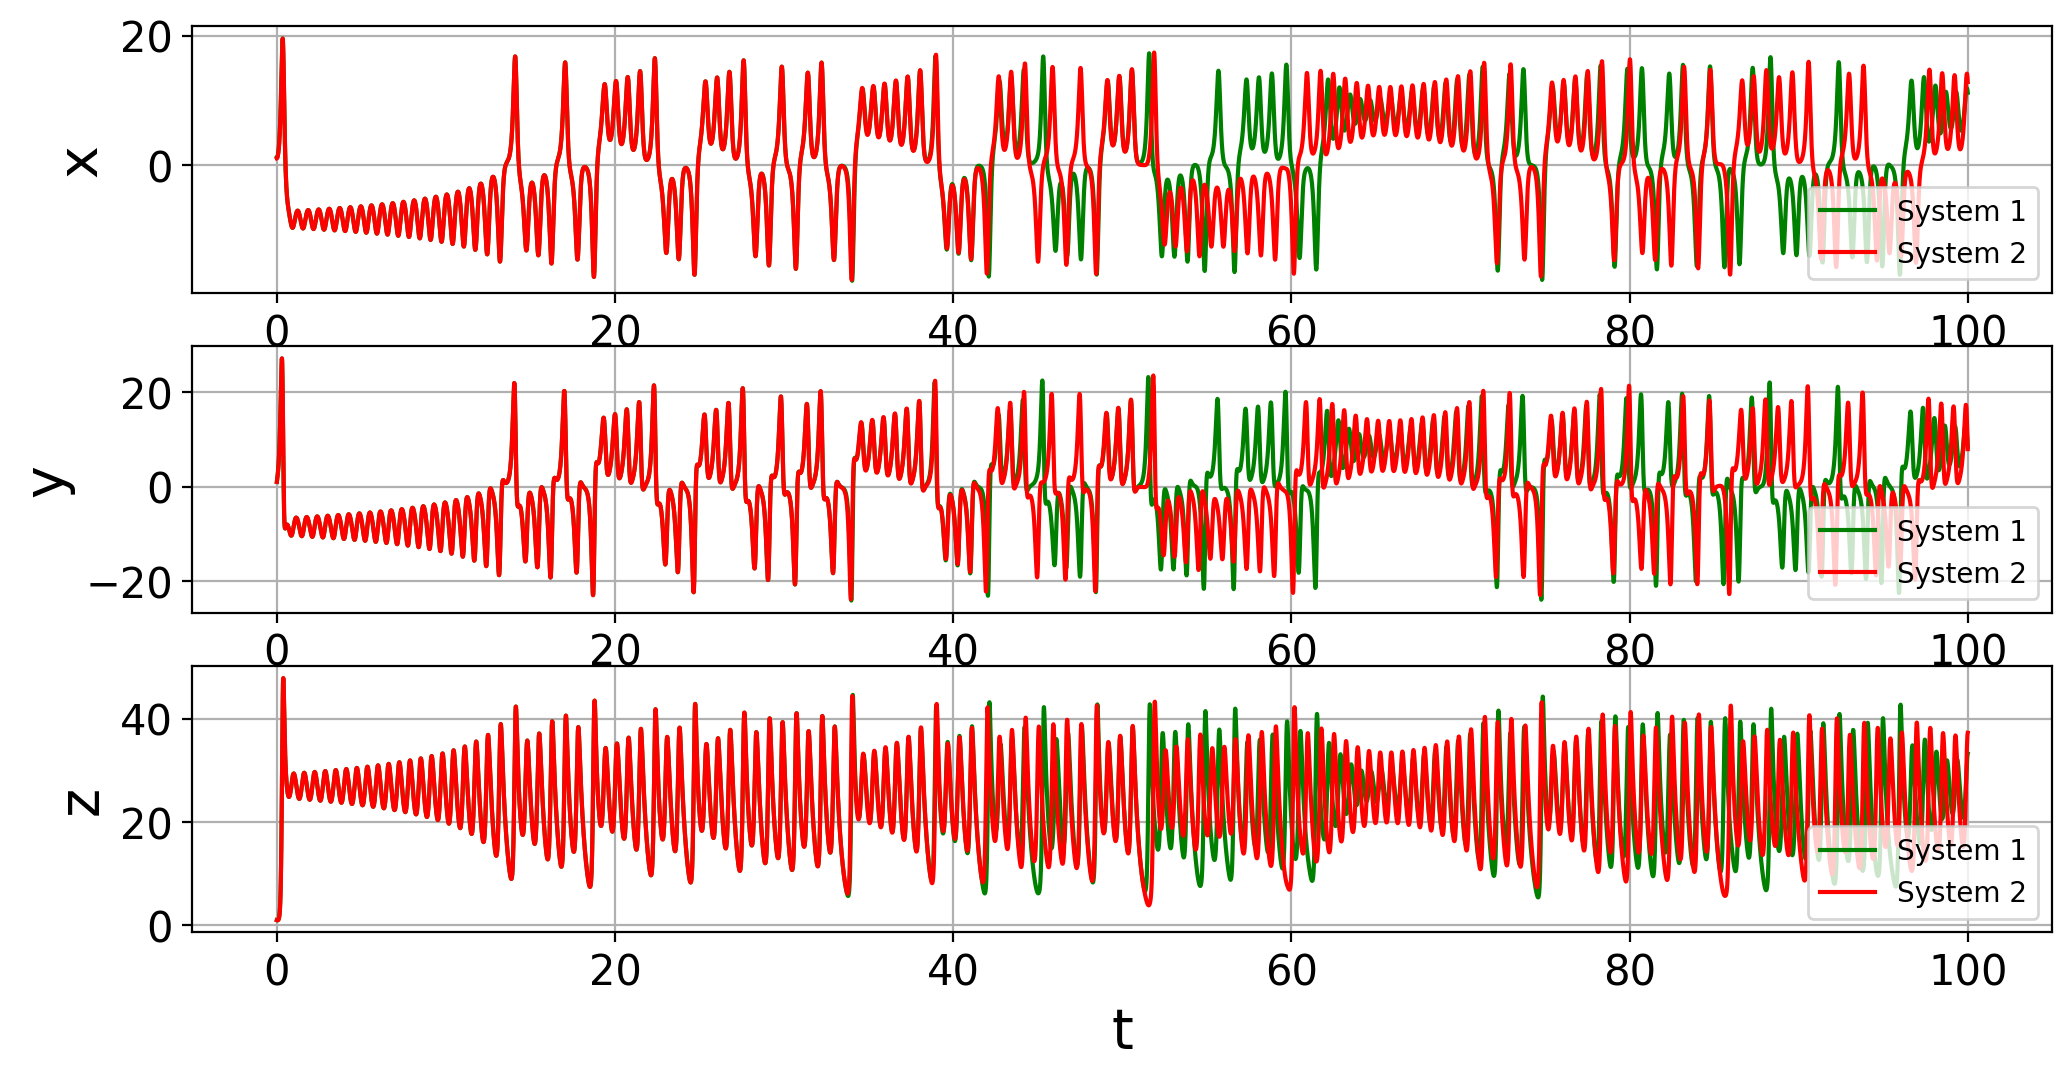

In [29]:
plt.rcParams["figure.figsize"] = (12,6) 
plt.subplot(311)
plt.plot(t, states[:,0], label='System 1', color='g')
plt.plot(t, states[:,3], label='System 2', color='r')
plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc='lower right')
plt.subplot(312)
plt.plot(t, states[:,1], label='System 1', color='g')
plt.plot(t, states[:,4], label='System 2', color='r')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.subplot(313)
plt.plot(t, states[:,2], label='System 1', color='g')
plt.plot(t, states[:,5], label='System 2', color='r')
plt.xlabel('t')
plt.ylabel('z')
plt.legend(loc='lower right')
plt.show()

Critical coupling, $\alpha_c$ is given by:
\begin{align}
\alpha_c = \frac{\Lambda}{2}
\end{align}

and above we calculated $\Lambda$ to be 0.928
Using our numerical Lyapunov exponent, $\frac{\Lambda}{2} = \frac{0.928}{2} = 0.464$. Try different $\alpha$ values to test this prediction.

# Synchronization in Driven Systems: A Master-Slave System

_See section 2.2.1 of [Deniz's paper](https://sites.icmc.usp.br/tiago/index.html/assets/synchronisation-of-chaos-and-its-applications.pdf) for full description_

In this setting, a master system (here chosen as a Lorenz system with parameters guaranteeing chaotic dynamics) is used to drive a slave system (a subsystem of a Lorenz system). These two systems share the set of parameters $\rho, \beta$ and $\sigma$. x-component of the master system is used to drive the slave system, which consists of only y and z components of a Lorenz system.

Such synchronization was introduced in [Pecora and Carroll, 1990]( https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.64.821).

The master system equations are:<br>
$\dot{x} = \sigma (y-x)$<br>
$\dot{y} = x(\rho-z)$-y<br>
$\dot{z} = xy - \beta z$<br>

Slave system equations are:<br>
$\dot{y}_s = x(\rho-z_s)-y_s$<br>
$\dot{z}_s = xy_s - \beta z_s$<br>
where subscript $\mathit{s}$ denotes slave system variables.  

In [30]:
# Lorenz System
def Lorenz(state,t):
    x, y, z = state  
    return np.array([sigma * (y - x), x * (rho - z) - y, x * y - beta * z])  

# Combined dynamics Master-Slave Lorenz Systems
def MS_System(state, t):
    M = state[:3]
    Sy, Sz = state[3:]
    Mxdot, Mydot, Mzdot = Lorenz(M, t)
    Sydot = M[0] * (rho - Sz) - Sy
    Szdot = - beta * Sz + M[0] * Sy
    return np.array([Mxdot,Mydot,Mzdot,Sydot,Szdot])

We can then solve these equations using the built-in ODE solver function after setting the various parameters:

In [31]:
# Simulation Parameters
Tmax = 10
dt = 0.01
N = int(Tmax/dt)

# Lorenz Parameters
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

# Solving the DEs of coupled dynamics
master = [-10.1, 10.1, 10.1]
slave = [0.1, 0.1]

timeline = np.arange(0.0, Tmax, dt)
s = odeint(MS_System, np.concatenate((master,slave)), timeline)



We can define the difference function between the $y$ and $z$ components of the Master and Slave Systems as:<br>
$\Delta y(t) = M_y(t) - S_y(t)$<br>
$\Delta z(t) = M_z(t) - S_z(t)$ where $M$ and $S$ are the Master and Slave systems respectively.

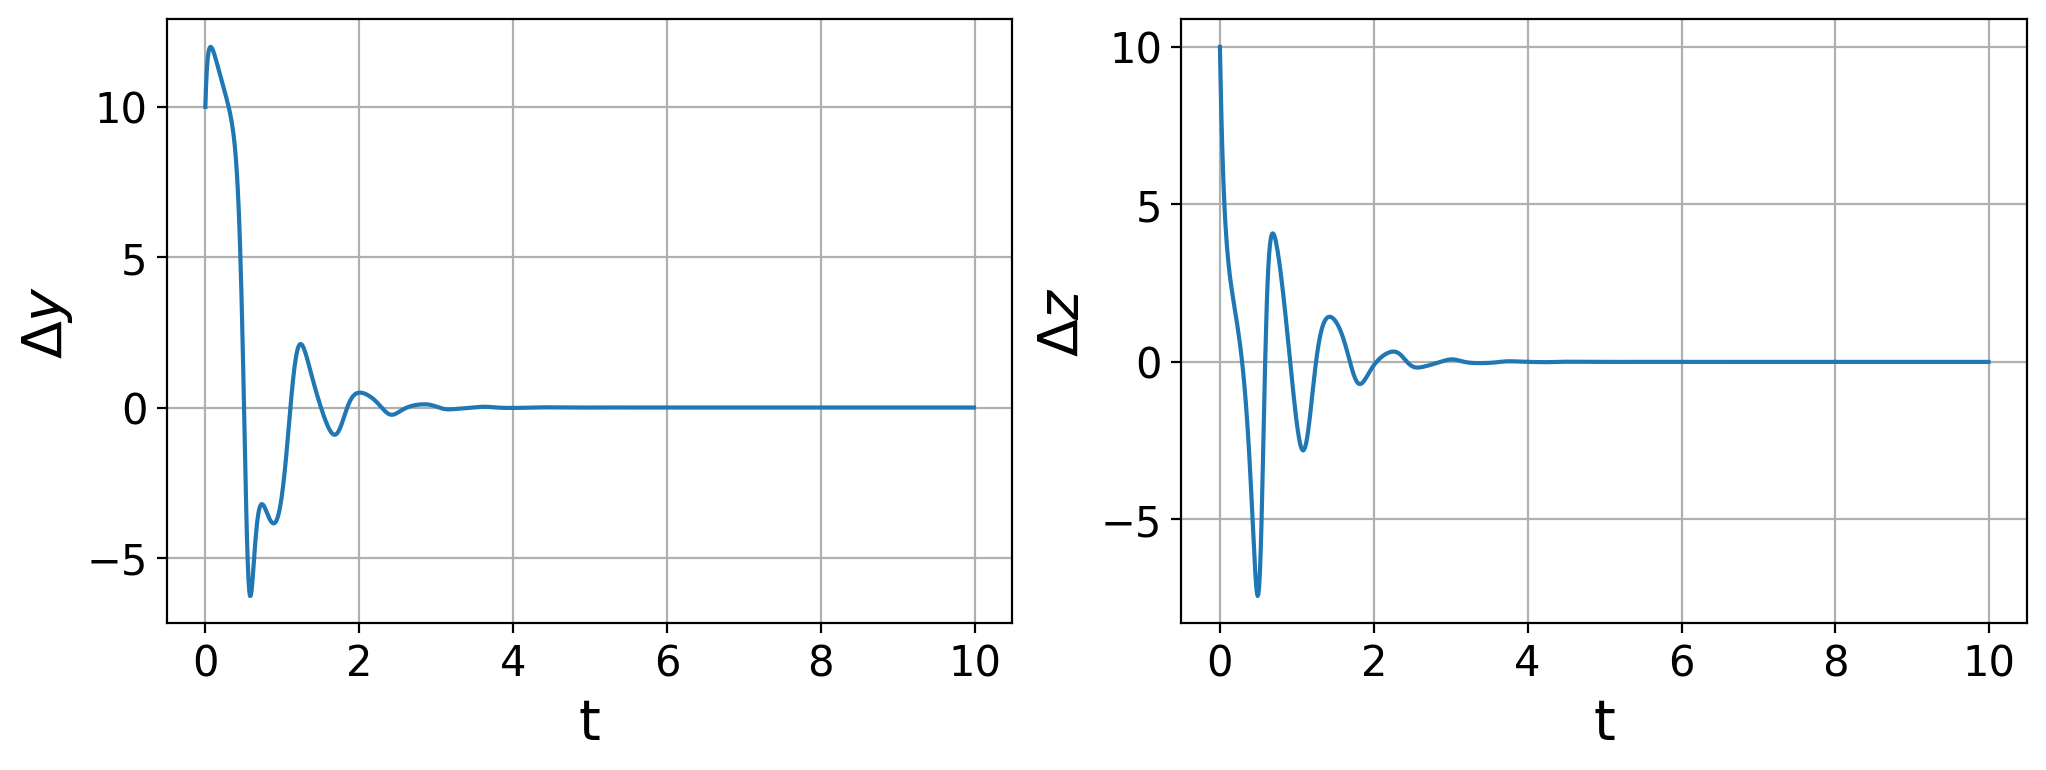

In [32]:
Delta_y = s[:,1]-s[:,3]
Delta_z = s[:,2]-s[:,4]
t = np.arange(0, Tmax,dt)

plt.rcParams["figure.figsize"] = (12,4)
plt.subplot(121)
plt.plot(t, Delta_y)
plt.xlabel('t')
plt.ylabel('$\Delta y$')
plt.subplot(122)
plt.plot(t, Delta_z)
plt.xlabel('t')
plt.ylabel('$\Delta z$')
plt.show()

The systems synchronize perfectly.